<h1>Imports</h1>

In [2]:
import numpy as np

from numpy.linalg import inv, pinv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

<h1>Logistic Regression with Maximum Log-Likelihood and Gradient Descent</h1>

In [3]:
def logreg_mle(x,y_true,learning_rate,max_iter=1000,w_est=None):
    '''
    Logistic Regression with MLE and GD algorithm
    input:
    x = NxNs matrix, data variable
    y_true = Ns matrix, ground truth labels
    learning_rate = gradient descent hyperparameter
    max_iter = maximum number of iteration
    
    Ns = number of samples
    N = dimension of features
    
    output:
    w_est = 1xN matrix, estimated weight
    n_miscls = misclassified examples in each iteration
    i = the number of iterations taken to converge,
        i==max_iter indicates possible non-convergence
    '''
    w_N = len(x)
    
    if w_est is None:
        w_est = np.random.rand(1,w_N)
    
    n_miscls = []
    
    for i in range(max_iter):
        y_est = (w_est.dot(x)>0)*1.0+(w_est.dot(x)<=0)*-1.0 #1xN
        y_est = y_est[0] #N length array from 1x100 matrix
        
        mis_cls = np.sum((y_est*y_true)<0)
        n_miscls.append(mis_cls)
        
        if mis_cls == 0:
            break
        
        grad_E = - np.mean(y_true*x / (1 + np.exp(y_true*w_est.dot(x))),axis=1)
        w_est = w_est - learning_rate * grad_E / np.sqrt(np.sum(grad_E*grad_E))
        
        if (i+1)%100 == 0 :
            learning_rate /= 2
    
    return w_est,n_miscls,i

<h1>Data</h1>

This example of Toy data is based off of Yaser Abu-Mustapha's course content at caltech.

(3, 15)
(3,)


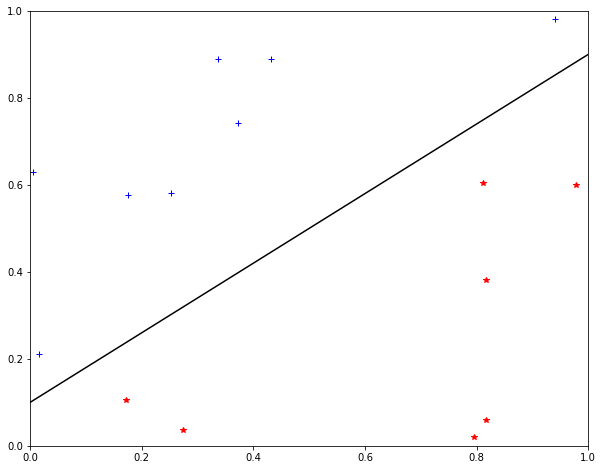

In [34]:
np.random.seed(100)

w_1 = 8.0 #w_1
w_2p = 10.0 #w_2'

m = w_1/w_2p
c = 0.1

w_0 = w_2p*c
w_2 = -w_2p

w_true = np.array([w_0, w_1, w_2])

N = 15 #less than VC Dimension times 6 samples

x = np.random.rand(3,N)
x[0,:] = 1

print x.shape #should print (3L, 10L) [windows] or (3,10) [linux] showing 3x10 matrix
print w_true.shape #should pring (3L,) [windows] or (3,) [linux] showing 3x1 matrix
#note that it is row vector instead or column

#now let us compute the labels
y_true = (w_true.dot(x)>0)*1.0+(w_true.dot(x)<=0)*-1.0

marker = {}
marker[-1.0] = '+b'
marker[1.0] = '*r'

#plotting the data points
for i in range(N):
    plt.plot(x[1,i],x[2,i],marker[y_true[i]])

#plotting the separation line
x_1__ = np.arange(0,1.0,0.001)
x_2__ = m*x_1__+c #the line that separates the classes


plt.plot(x_1__,x_2__,'-k')
plt.xlim([0,1.0])
plt.ylim([0,1.0])

plt.show()

#you should see a perfectly separed data

<h1>Tarining Moels</h1>

Here we train 4 models.

In [38]:
max_iter = 1000
learning_rate = 0.6

#4 different models
np.random.seed(101)
w_est1, n_miscls2, number_it1 = logreg_mle(x,y_true,0.6)
np.random.seed(102)
w_est2, n_miscls2, number_it2 = logreg_mle(x,y_true,0.6)
np.random.seed(103)
w_est3, n_miscls3, number_it3 = logreg_mle(x,y_true,0.6)
np.random.seed(104)
w_est4, n_miscls5, number_it6 = logreg_mle(x,y_true,0.6)

#creating test data
N_test = 10000
x_test = np.random.rand(3,N_test)
x_test[0,:] = 1

#evaluating the models
y_test_true = (w_true.dot(x_test)>0)*1.0+(w_true.dot(x_test)<=0)*-1.0 #actual classes
y_test_class = 1.0*(y_test_true>0);
y_test1 = (w_est1.dot(x_test)>0)*1.0+(w_est1.dot(x_test)<=0)*-1.0 #Model 1
y_test1_prob = 1/(1+np.exp(-w_est1.dot(x_test))) #probabilistic interpretation for Model 1
y_test2 = (w_est2.dot(x_test)>0)*1.0+(w_est2.dot(x_test)<=0)*-1.0 #Model 2
y_test2_prob = 1/(1+np.exp(-w_est2.dot(x_test))) #probabilistic interpretation for Model 3
y_test3 = (w_est3.dot(x_test)>0)*1.0+(w_est3.dot(x_test)<=0)*-1.0 #model 3
y_test3_prob = 1/(1+np.exp(-w_est3.dot(x_test))) #probabilistic interpretation for Model 3
y_test4 = (w_est4.dot(x_test)>0)*1.0+(w_est4.dot(x_test)<=0)*-1.0 #Model 4
y_test4_prob = 1/(1+np.exp(-w_est4.dot(x_test))) #probabilistic interpretation for Model 4

#Accuracies
th = 0.5 #Classifier threshold = 0.5
acc1 = np.mean(y_test_class==1.0*(y_test1_prob>th))
acc2 = np.mean(y_test_class==1.0*(y_test2_prob>th))
acc3 = np.mean(y_test_class==1.0*(y_test3_prob>th))
acc4 = np.mean(y_test_class==1.0*(y_test4_prob>th))

#linear Average
accx = np.mean(y_test_class==1.0*(y_test1_prob+y_test2_prob+y_test3_prob+y_test4_prob>4*th))
#mean Accuracy
mean_accx = np.mean([acc1, acc2, acc3, acc4])

print 'Accuracy of Model 1:', acc1
print 'Accuracy of Model 2:', acc2
print 'Accuracy of Model 3:', acc3
print 'Accuracy of Model 4:', acc4
print 'Accuracy of Linear Average:', accx
print 'Mean Accuracy:', mean_accx

Accuracy of Model 1: 0.9651
Accuracy of Model 2: 0.9398
Accuracy of Model 3: 0.918
Accuracy of Model 4: 0.9599
Accuracy of Linear Average: 0.9589
Mean Accuracy: 0.9457
